In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

import FinanceDataReader as fdr
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly, add_changepoints_to_plot


In [25]:
#
STOCK_CODE = 'KS200'

In [26]:
stock1 = fdr.DataReader(STOCK_CODE)
stock2 = stock1.copy()
stock3 = stock1.copy()
stock4 = stock1.copy()

In [27]:
stock1.columns

Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Change'], dtype='object')

In [28]:
stock1['ds'] = stock1.index
stock2['ds'] = stock1.index
stock3['ds'] = stock1.index
stock4['ds'] = stock1.index

stock1['y'] = stock1['Open']
stock2['y'] = stock1['Close']
stock3['y'] = stock1['High']
stock4['y'] = stock1['Low']

In [29]:
#stock1['ds'] 

In [30]:
df1 = stock1.iloc[-300:]
df2 = stock2.iloc[-300:]
df3 = stock3.iloc[-300:]
df4 = stock4.iloc[-300:]

In [31]:
m1 = Prophet(
    changepoint_prior_scale=0.3,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)
m2 = Prophet(
    changepoint_prior_scale=0.3,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)
m3 = Prophet(
    changepoint_prior_scale=0.3,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)
m4 = Prophet(
    changepoint_prior_scale=0.3,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)


In [32]:
m1.fit(df1)
m2.fit(df2)
m3.fit(df3)
m4.fit(df4)

Initial log joint probability = -2.67507
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1205.69    0.00265258       196.175      0.4702           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1208.21    0.00243756       151.828      0.6864      0.6864      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1208.58    0.00124147       40.1748           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        1209.1   0.000265342       74.4434       0.554       0.554      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     424       1209.32   1.07105e-05       29.2548   6.452e-07       0.001      538  LS failed, Hessian reset 
     454       1209.43    5.4892e-06    

b        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2199       1235.52   0.000394473       73.2086           1           1     3558   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2299       1235.57   3.78082e-06       11.7746      0.2987      0.2987     3691   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2399       1236.71    0.00169979       83.5263      0.2029      0.8292     3810   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2499       1237.12   0.000727795       30.7558      0.3591      0.3591     3926   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2599       1237.79    0.00683384       86.6753      0.1819      0.1819     4037   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2699       1238.02    0.005335

In [33]:
future1 = m1.make_future_dataframe(periods=30, freq='D')
future2 = m2.make_future_dataframe(periods=30, freq='D')
future3 = m3.make_future_dataframe(periods=30, freq='D')
future4 = m4.make_future_dataframe(periods=30, freq='D')
#future.tail()

In [34]:
forecast1 = m1.predict(future1)
forecast2 = m2.predict(future2)
forecast3 = m3.predict(future3)
forecast4 = m4.predict(future4)


In [35]:
forecast1[-30:-28]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
300,2021-08-11,422.057702,426.711352,438.566214,422.057702,422.057702,10.623665,10.623665,10.623665,10.623665,10.623665,10.623665,0.0,0.0,0.0,432.681368
301,2021-08-12,422.177936,426.615077,438.568940,422.177936,422.177936,10.380107,10.380107,10.380107,10.380107,10.380107,10.380107,0.0,0.0,0.0,432.558043


In [36]:
forecast1[-31:-28][["ds","yhat_lower","yhat_upper","yhat"]]

,ds,yhat_lower,yhat_upper,yhat
299,2021-08-10,426.470267,438.597639,432.723064
300,2021-08-11,426.711352,438.566214,432.681368
301,2021-08-12,426.615077,438.568940,432.558043


In [37]:
forecast2[-31:-28][["ds","yhat_lower","yhat_upper","yhat"]]

,ds,yhat_lower,yhat_upper,yhat
299,2021-08-10,424.868686,437.072855,431.018343
300,2021-08-11,424.324215,436.306837,430.738578
301,2021-08-12,424.222916,436.186827,430.372884


In [38]:
forecast3[-31:-28][["ds","yhat_lower","yhat_upper","yhat"]]

,ds,yhat_lower,yhat_upper,yhat
299,2021-08-10,429.327510,439.565989,434.491437
300,2021-08-11,428.969425,439.228452,434.385813
301,2021-08-12,429.490366,439.023193,434.174785


In [39]:
forecast4[-31:-28][["ds","yhat_lower","yhat_upper","yhat"]]

,ds,yhat_lower,yhat_upper,yhat
299,2021-08-10,423.030484,434.616215,428.875871
300,2021-08-11,422.614539,434.221359,428.605051
301,2021-08-12,422.108028,434.417914,428.254849


In [40]:
#ds = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-300:]

In [41]:
#fig = plot_plotly(m, forecast)
#fig

In [42]:

#plot_components_plotly(m, forecast)

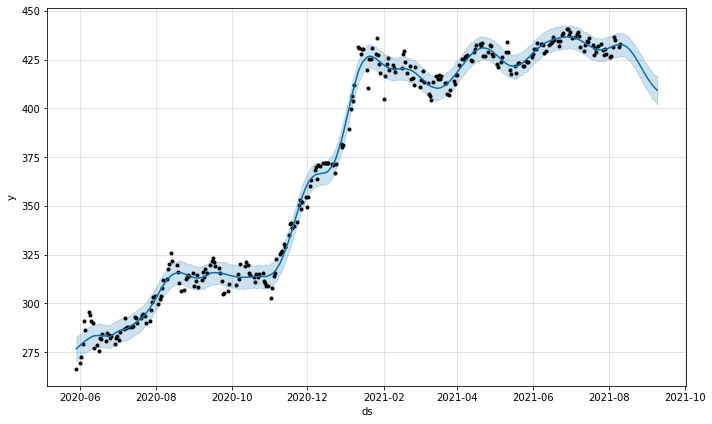

In [43]:
fig = m1.plot(forecast1)
#a = add_changepoints_to_plot(fig.gca(), m, forecast)

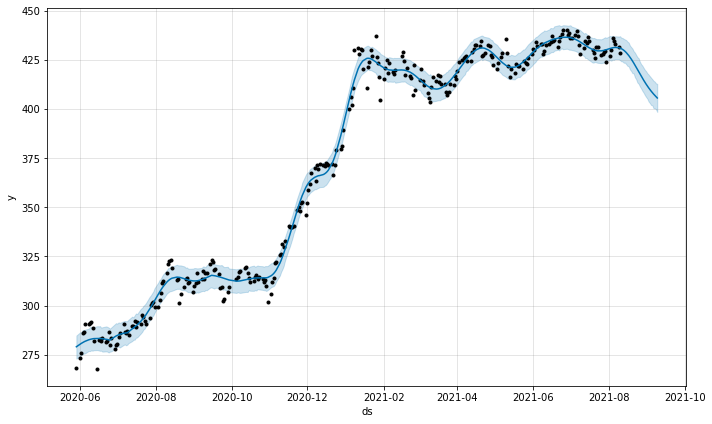

In [44]:
fig2 = m2.plot(forecast2)

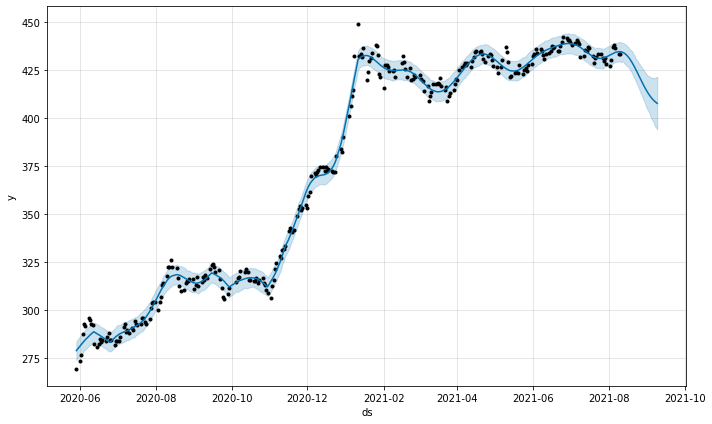

In [45]:
fig3 = m3.plot(forecast3)

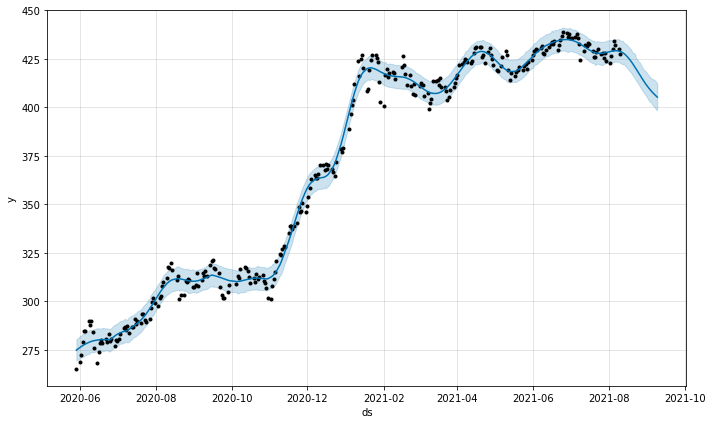

In [46]:
fig4 = m4.plot(forecast4)